## NAME - Abhishek Pandey
## B.Tech 3rd year 
## College - Madan Mohan Malviya University Of Technology 

## ------------------------------------------------------Project 1---------------------------------------------------------------
### ...........................................................Prediction using supervised ML.......................................................................

In [1]:
# Importing all libraries 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

In [3]:
# Reading data from given link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
s_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
## now we will see few parameters to find which algorithm to use.
s_data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Here we can see the correlation between the independent feature "Hours" and ddependent feature "Scores" is positive and close enough to 1 .

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

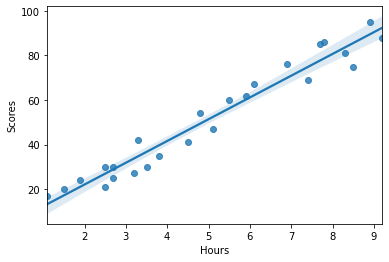

In [5]:
sns.regplot(x='Hours',y='Scores',data=s_data)

By seeing this regression plot we can say linear plot plot is appropriate here .

C:\Users\Abhishek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

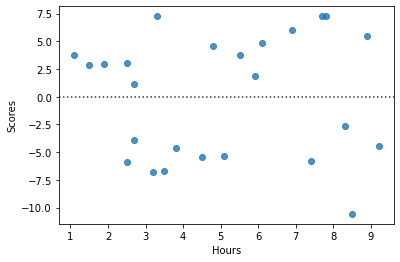

In [6]:
sns.residplot(s_data['Hours'],s_data['Scores'])

From the above graph we can see that there is no curvature which again suggests that a linear plot is appropriate

By some of the above results we can easily say that Linear Regression will be a better choice

### **Preparing the data**

The next step is to divide the data into "independent" and "Dependent" variables  .

In [7]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values 

Now that we have our independent and dependent variables, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [8]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [9]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
print("Training complete.")

Training complete.


In [10]:
print("Training Accuracy of Regression: ", regressor.score(X_train,y_train))

Training Accuracy of Regression:  0.9515510725211552


### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [11]:
print("Training Accuracy of Regression: ", regressor.score(X_train,y_train))

Training Accuracy of Regression:  0.9515510725211552


In [12]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores
print(y_pred)
print(y_test)


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]
[20 27 69 30 62]


In [13]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [14]:
# testing for our data
hours = [[9.25]]                       ## as the predict function needs a 2D array
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


###  This is our required result so if a student studies for about 9.25 hours he or she can  score about 93

### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is important to see how well our algorithm perform on a particular dataset . For simplicity here, we have chosen the mean square error. There are many such metrics.

In [15]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


#### we can see its a better result as the "MSE" is closer to zero more it is closer to 0 more perfectly our model will predict for any given input.